In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

!pip install talib
!pip install yfinance

import yfinance as yf

%matplotlib inline

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
# Stock symbol ??????
sw = yf.Ticker('LUV')
data = sw.history(period='60d', interval='1h')
delair = yf.Ticker('DAL')
deldata = delair.history(period='60d', interval='1h')
oil = yf.Ticker('CLH24')
oildata = oil.history(period='60d', interval='1h')

ERROR:yfinance:CLH24: No data found, symbol may be delisted


In [4]:
print(sw)
print(data)
print(delair)
print(deldata)
print(oil)
print(oildata)

yfinance.Ticker object <LUV>
                                Open       High        Low      Close  \
Datetime                                                                
2023-10-31 09:30:00-04:00  22.340000  22.389999  22.004999  22.020000   
2023-10-31 10:30:00-04:00  22.010000  22.290001  21.920000  22.230000   
2023-10-31 11:30:00-04:00  22.230000  22.400000  22.209999  22.275000   
2023-10-31 12:30:00-04:00  22.280001  22.485001  22.200001  22.385000   
2023-10-31 13:30:00-04:00  22.389999  22.430000  22.139999  22.150000   
...                              ...        ...        ...        ...   
2024-01-26 11:30:00-05:00  30.180000  30.275000  29.955000  30.010000   
2024-01-26 12:30:00-05:00  30.004999  30.045000  29.809999  30.014999   
2024-01-26 13:30:00-05:00  30.020000  30.020000  29.850000  29.975000   
2024-01-26 14:30:00-05:00  29.975000  29.990000  29.700001  29.725000   
2024-01-26 15:30:00-05:00  29.725000  30.110001  29.684999  30.090000   

                     

In [15]:
# https://towardsdatascience.com/algorithmic-trading-with-macd-and-python-fef3d013e9f3#:~:text=The%20MACD%20is%20calculated%20by,it%20would%20be%20an%20uptrend.

data = yf.download('LUV','2016-1-1','2020-1-1')
data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])
fig = plt.figure()
# This script downloads the data, and then it calculates the macd values such as the signal and the histogram that defines the trend.



# https://medium.com/@financial_python/building-a-macd-indicator-in-python-190b2a4c1777

# data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean

# # Calculate the 26-period EMA
# data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

# # Calculate MACD (the difference between 12-period EMA and 26-period EMA)
# data['MACD'] = data['EMA12'] - data['EMA26']

# # Calculate the 9-period EMA of MACD (Signal Line)
# data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

[*********************100%%**********************]  1 of 1 completed


NameError: name 'talib' is not defined

In [8]:
start = "2010-01-01"
end = '2023-1-01'
tcs = yf.download('TCS',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


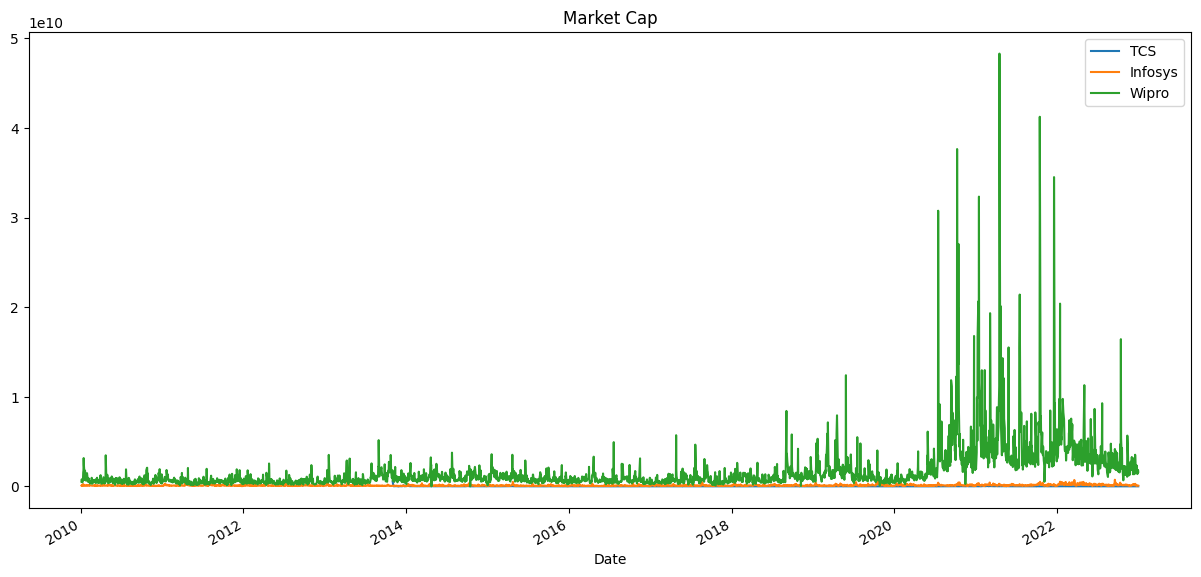

In [9]:
#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

<Axes: xlabel='Date'>

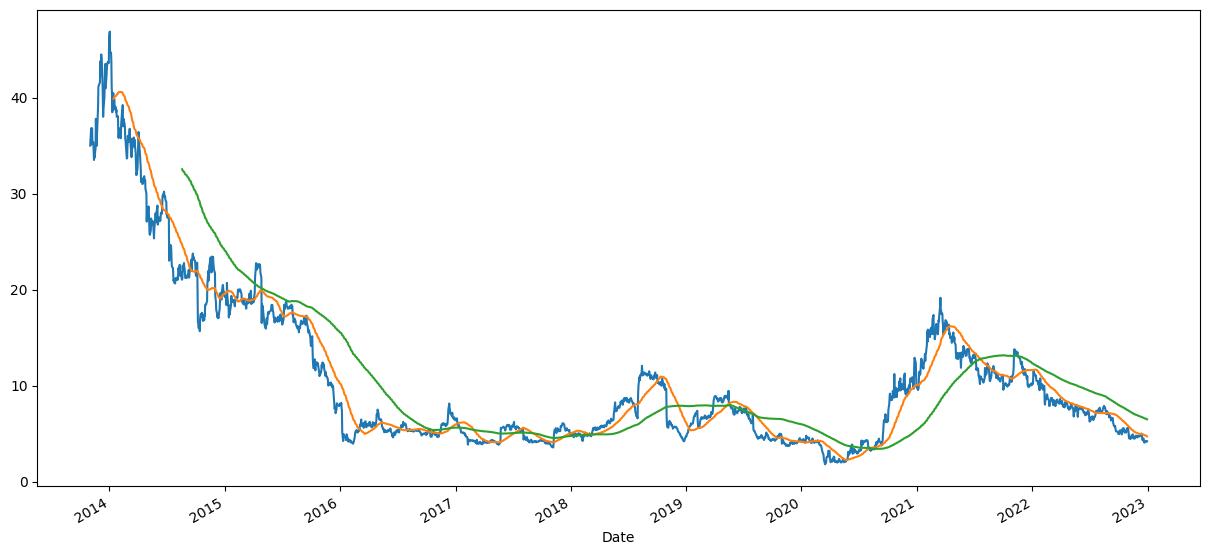

In [4]:
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

array([[<Axes: xlabel='TCSOpen', ylabel='TCSOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='TCSOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='TCSOpen'>],
       [<Axes: xlabel='TCSOpen', ylabel='InfosysOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='InfosysOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='InfosysOpen'>],
       [<Axes: xlabel='TCSOpen', ylabel='WiproOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='WiproOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='WiproOpen'>]], dtype=object)

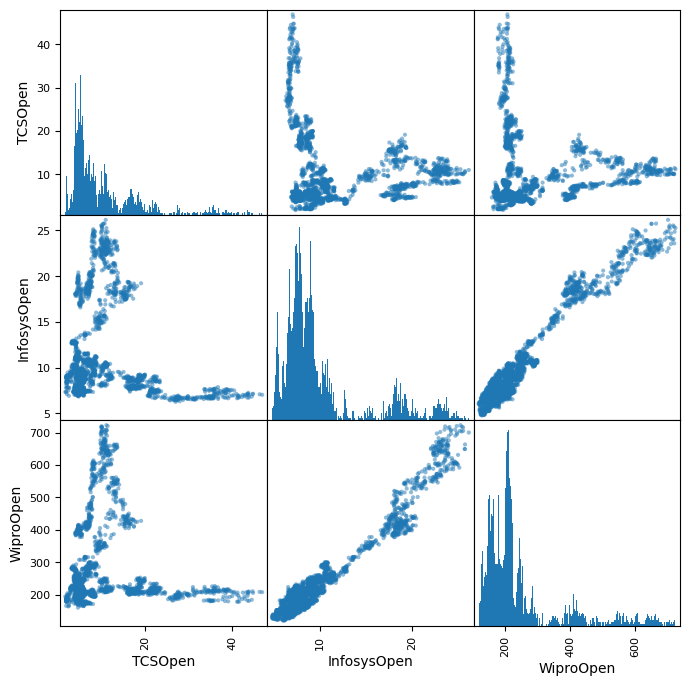

In [5]:
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

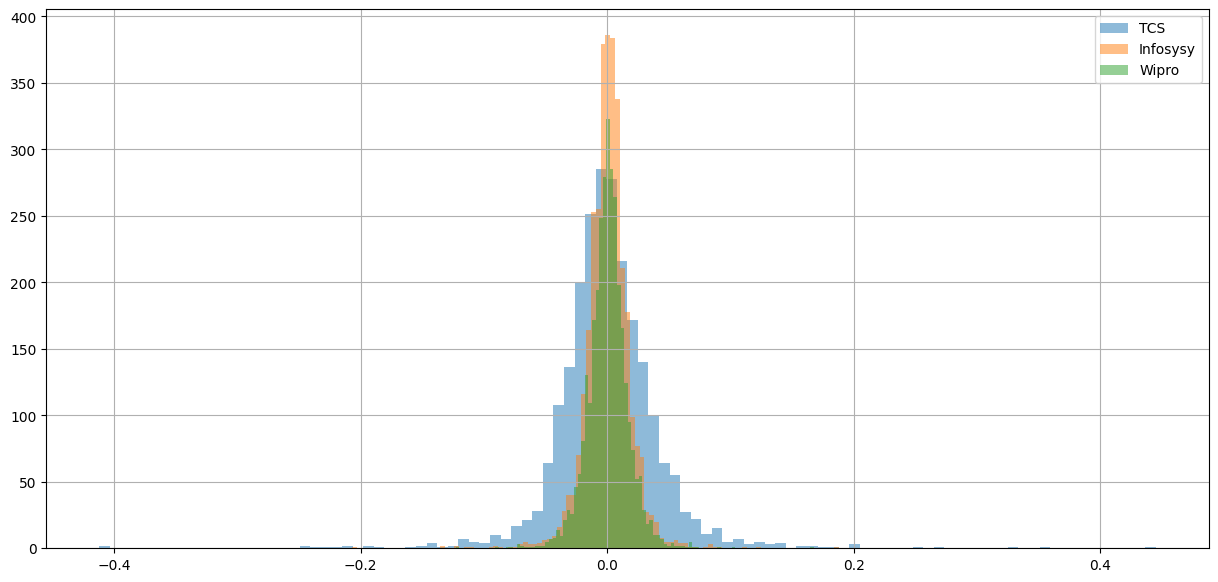

In [6]:
#Volatility
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()